In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Generate synthetic data
np.random.seed(0)
num_points = 100
X = np.random.randn(num_points, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Linearly separable data

In [ ]:
# Add a bias term (intercept)
X_bias = np.c_[np.ones((num_points, 1)), X]

In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# Logistic regression prediction
def predict(X, theta):
    return sigmoid(np.dot(X, theta))

In [ ]:
# Cost function for logistic regression
def cost_function(X, y, theta):
    predictions = predict(X, theta)
    cost = -(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost.mean()

In [ ]:
# Gradient descent algorithm
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []
    theta_history = [theta.copy()]

    for i in range(num_iterations):
        gradients = np.dot(X.T, (predict(X, theta) - y)) / m
        theta -= learning_rate * gradients
        cost_history.append(cost_function(X, y, theta))
        theta_history.append(theta.copy())

    return theta_history, cost_history

In [ ]:
# Plotting decision boundary
def plot_decision_boundary(X, y, theta, iteration):
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')

    # Decision boundary: theta0 + theta1*x1 + theta2*x2 = 0
    x_values = np.array([X[:, 1].min(), X[:, 1].max()])
    y_values = -(theta[0] + theta[1] * x_values) / theta[2]

    plt.plot(x_values, y_values, 'g-', label=f"Iteration {iteration}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Boundary after {iteration} iterations')
    plt.legend()
    plt.show()

Loss after 10 iterations: 0.5258096804419061


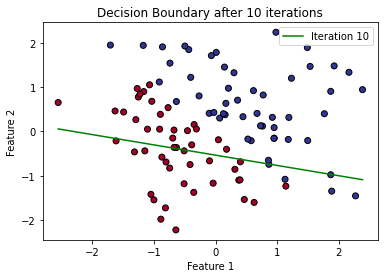

In [ ]:
# Initialize theta with random values instead of zeros
np.random.seed(42)
theta_init = np.random.randn(X_bias.shape[1])

learning_rate = 0.1
num_iterations_total = 100  # Total number of iterations to perform

# Perform gradient descent and capture the theta values at each iteration
theta_history, cost_history = gradient_descent(X_bias, y, theta_init, learning_rate, num_iterations_total)

# Plot decision boundary and print the loss for a specific iteration
def plot_for_iteration(iteration):
    if 0 <= iteration < len(theta_history):
        print(f"Loss after {iteration} iterations: {cost_history[iteration]}")
        plot_decision_boundary(X_bias, y, theta_history[iteration], iteration)
    else:
        print(f"Please enter a valid iteration number between 0 and {len(theta_history) - 1}")

# Example: Plot the decision boundary and print loss after 10 iterations
plot_for_iteration(10)  # You can change this to any other iteration